<a href="https://colab.research.google.com/github/HimalayanPanda/q-learning-exploration/blob/main/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Q-Learning

## Basic implementation of Q-Learning Principles
To better understand the underlying logic of how Q-Learning works, I asked ChatGPT to write me a small model which outlines the basics in the implementation of q-learning.

The code below is a basic implementation of q-learning principles. There is a `reward_table` for each state-action pair which defines the environment. The model then randomly gets a state and action to get the reward of the action in that state. It uses the information to update the `q_table` which tells us the best action in any given state.


In [ ]:
import numpy as np

#adding a seed for consistent results when running multiple times
np.random.seed(100)

#reward table, contains rewards for each state-action pair
reward_table = np.array([[10, -50],
                         [-50, 5],
                         [25, 25]])

#q-table, initialized with zeros
q_table = np.zeros((3, 2))

#learning rate
alpha = 0.5

#discount rate
gamma = 0.9

print('Initial Q-Table:\n', q_table, '\n')

for episode in range(10000):
    #state can be 0, 1, 2
    state = np.random.randint(0, 3)

    #action can be 0, 1
    action = np.random.randint(0, 2)

    #get reward
    reward = reward_table[state, action]

    #get the maximum future reward for new_state over all actions
    future_reward = np.max(q_table[state, :])

    #apply the Q-learning formula
    old_value = q_table[state, action]
    q_table[state, action] = old_value + alpha * (reward + gamma * future_reward - old_value)

    if episode in [10, 50, 100, 500, 1000, 2813, 2814, 5000, 9999]:
        print('Q-Table After %d Episodes:\n' % episode, q_table, '\n')

print('Final Q-Table:\n', q_table)
print(np.max(q_table[0, :]))

Initial Q-Table:
 [[0. 0.]
 [0. 0.]
 [0. 0.]] 

Q-Table After 10 Episodes:
 [[ 14.2625    -34.04125  ]
 [-25.          0.       ]
 [ 38.0609375  18.125    ]] 

Q-Table After 50 Episodes:
 [[ 40.12630608 -14.02222767]
 [-34.69328995  16.82897844]
 [101.33876852 114.6100845 ]] 

Q-Table After 100 Episodes:
 [[ 64.15140776   2.74645377]
 [-27.8913777   25.61625104]
 [173.5971731  182.26270602]] 

Q-Table After 500 Episodes:
 [[ 98.58401309  38.52604011]
 [ -5.68981172  49.32740622]
 [249.28784864 249.25809207]] 

Q-Table After 1000 Episodes:
 [[ 99.97994981  39.97633058]
 [ -5.01824622  49.98144738]
 [249.99814113 249.99820827]] 

Q-Table After 2813 Episodes:
 [[ 99.99999999  40.        ]
 [ -5.          50.        ]
 [250.         250.        ]] 

Q-Table After 2814 Episodes:
 [[100.  40.]
 [ -5.  50.]
 [250. 250.]] 

Q-Table After 5000 Episodes:
 [[100.  40.]
 [ -5.  50.]
 [250. 250.]] 

Q-Table After 9999 Episodes:
 [[100.  40.]
 [ -5.  50.]
 [250. 250.]] 

Final Q-Table:
 [[100.  40.]

Here, the final `q_table` is:

[

    [100.  40.]
    [ -5.  50.]
    [250. 250.]

 ]

So,

    Q(0) is action 0
    Q(1) is action 1
    Q(2) is either 0 or 1 (as the rewards are equal)
Which reflects the `reward_table`

## AU Post

Now that we understand the basics of Q-Learning, I will implement a Q-Learning solution to a more practical problem.

### Scenario

Australia Post is opening a new warehouse to store products and they want it to be automated. They want robots to move goods from the relevant location to the docking bay where it will be delivered to their customers.

We want to use q-learning to find the shortest path to the docking bay from anywhere in the warehouse.

Lets create an environment, The image below represents the floor plan of the new warehouse where the black cells are shelves where packages are stored, the grey cells are the walkways and the green cell is the docking bay.

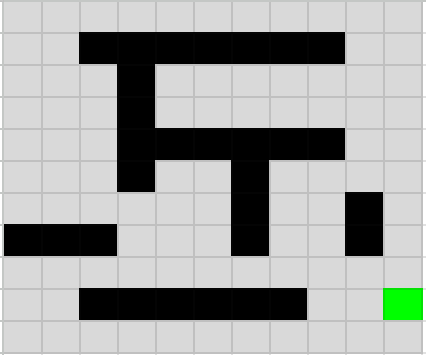

we'll number the cells from the bottom left corner. So the bottom-left corner would be (0,0) and docking bay would be at (10, 1).

In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
env_rows = 11
env_columns = 11

#creating a 3D array to hold the q-values for state and action pairs
#we need a 3D array because the state is a 2D grid and there are 4 actions, so we'll need a q-value for each unique combination.
q_table = np.zeros((env_rows, env_columns, 4))

In [ ]:
#the actions are up, left, down, right
actions = ['up', 'left', 'down', 'right']

Setting up the rewards

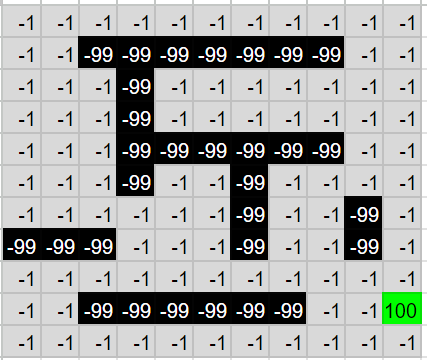

In [ ]:
#initialising everything to -1
rewards = np.full((env_rows, env_columns), -1)
#setting the docking bay
rewards[10, 1] = 100
#setting the rewards for the shelves
rewards[2,1] = -99
rewards[3,1] = -99
rewards[4,1] = -99
rewards[5,1] = -99
rewards[6,1] = -99
rewards[7,1] = -99
rewards[0,3] = -99
rewards[1,3] = -99
rewards[2,3] = -99
rewards[6,3] = -99
rewards[9,3] = -99
rewards[6,4] = -99
rewards[9,4] = -99
rewards[3,5] = -99
rewards[6,5] = -99
rewards[3,6] = -99
rewards[4,6] = -99
rewards[5,6] = -99
rewards[6,6] = -99
rewards[7,6] = -99
rewards[8,6] = -99
rewards[3,7] = -99
rewards[3,8] = -99
rewards[2,9] = -99
rewards[3,9] = -99
rewards[4,9] = -99
rewards[5,9] = -99
rewards[6,9] = -99
rewards[7,9] = -99
rewards[8,9] = -99

for row in rewards:
  print(row)

[ -1  -1  -1 -99  -1  -1  -1  -1  -1  -1  -1]
[ -1  -1  -1 -99  -1  -1  -1  -1  -1  -1  -1]
[ -1 -99  -1 -99  -1  -1  -1  -1  -1 -99  -1]
[ -1 -99  -1  -1  -1 -99 -99 -99 -99 -99  -1]
[ -1 -99  -1  -1  -1  -1 -99  -1  -1 -99  -1]
[ -1 -99  -1  -1  -1  -1 -99  -1  -1 -99  -1]
[ -1 -99  -1 -99 -99 -99 -99  -1  -1 -99  -1]
[ -1 -99  -1  -1  -1  -1 -99  -1  -1 -99  -1]
[ -1  -1  -1  -1  -1  -1 -99  -1  -1 -99  -1]
[ -1  -1  -1 -99 -99  -1  -1  -1  -1  -1  -1]
[ -1 100  -1  -1  -1  -1  -1  -1  -1  -1  -1]


**Putting code into helper functions for readability**

In [ ]:
#define a function that determines if the specified location is a terminal state
def is_terminal_state(current_row_index, current_column_index):
  #if the reward for this location is -1, then it is not a terminal state (i.e., it is a 'white square')
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True

#define a function that will choose a random, non-terminal starting location
def get_starting_location():
  #get a random row and column index
  current_row_index = np.random.randint(env_rows)
  current_column_index = np.random.randint(env_columns)
  #continue choosing random row and column indexes until a non-terminal state is identified
  #(i.e., until the chosen state is a 'white square').
  while is_terminal_state(current_row_index, current_column_index):
    current_row_index = np.random.randint(env_rows)
    current_column_index = np.random.randint(env_columns)
  return current_row_index, current_column_index

#define an epsilon greedy algorithm that will choose which action to take next (i.e., where to move next)
def get_next_action(current_row_index, current_column_index, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon,
  #then choose the most promising value from the Q-table for this state.
  if np.random.random() < epsilon:
    return np.argmax(q_table[current_row_index, current_column_index])
  else: #choose a random action
    return np.random.randint(4)

#define a function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < env_columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < env_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index

#Define a function that will get the shortest path between any location within the warehouse that
#the robot is allowed to travel to the docking bay.
def get_shortest_path(start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
  if is_terminal_state(start_row_index, start_column_index):
    return []
  else: #if this is a 'legal' starting location
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    #continue moving along the path until we reach the goal (i.e., the docking bay)
    while not is_terminal_state(current_row_index, current_column_index):
      #get the best action to take
      action_index = get_next_action(current_row_index, current_column_index, 1.)
      #move to the next location on the path, and add the new location to the list
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])
    return shortest_path

Now, its time to train the model

In [ ]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn

#run through 10000 training episodes
for episode in range(10000):

  #get the starting location for this episode
  row_index, column_index = get_starting_location()

  #continue taking actions (i.e., moving) until we reach a terminal state
  while not is_terminal_state(row_index, column_index):
    #choose which action to take (i.e., where to move next)
    action_index = get_next_action(row_index, column_index, epsilon)

    #perform the chosen action, and transition to the next state
    old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
    row_index, column_index = get_next_location(row_index, column_index, action_index)

    #receive the reward for moving to the new state, and calculate the temporal difference
    reward = rewards[row_index, column_index]

    old_q_value = q_table[old_row_index, old_column_index, action_index]
    temporal_difference = reward + (discount_factor * np.max(q_table[row_index, column_index])) - old_q_value

    #update the Q-value for the previous state and action pair
    new_q_value = old_q_value + (learning_rate * temporal_difference)
    q_table[old_row_index, old_column_index, action_index] = new_q_value

print('Training complete!')

Training complete!


### Model Evaluation

Lets run the model in the exploitation phase with the final q-table

In [ ]:
#creating variables for model evaluation
cumu_reward_array = [0] * 100
episode_length_array = [0] * 100

#run through 100 episodes
for episode in range(100):
  #creating variables for model evaluation
  cumu_reward = 0
  episode_length = 0

  #get the starting location for this episode
  row_index, column_index = get_starting_location()

  #continue taking actions (i.e., moving) until we reach a terminal state
  while not is_terminal_state(row_index, column_index):
    #incrementing the episode length
    episode_length += 1
    #choose which action to take
    action_index = get_next_action(row_index, column_index, 1.1)

    #perform the chosen action, and transition to the next state
    old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
    row_index, column_index = get_next_location(row_index, column_index, action_index)

    #receive the reward for moving to the new state, and calculate the temporal difference
    reward = rewards[row_index, column_index]

    #adding current reward to the cumulative reward
    cumu_reward += reward

  cumu_reward_array[episode] = cumu_reward
  episode_length_array[episode] = episode_length

print('Done!')

Done!


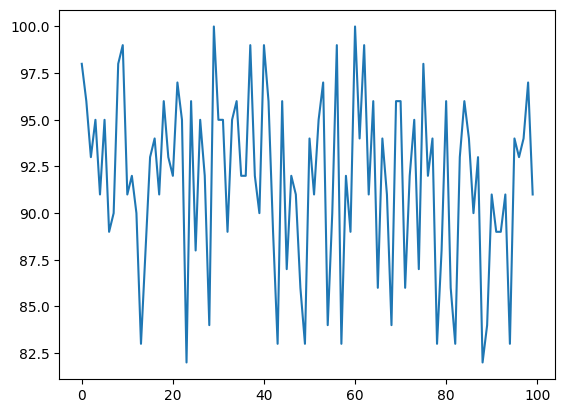

In [ ]:
x_coordinate = [ i for i in range(len(cumu_reward_array)) ]
plt.plot(x_coordinate,cumu_reward_array)
plt.show()

The model seems to be performing quite well. It has culumative rewards of over 82.5 in the final exploitation phase.

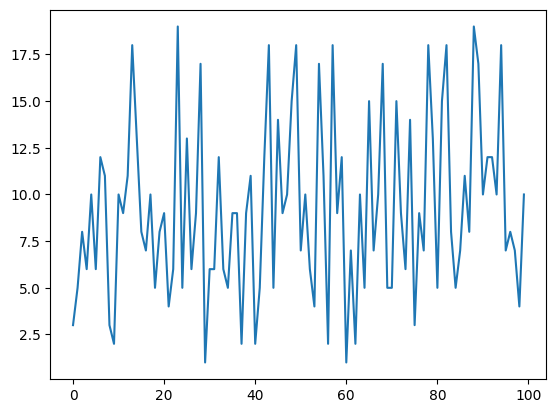

In [ ]:
x_coordinate = [ i for i in range(len(episode_length_array)) ]
plt.plot(x_coordinate,episode_length_array)
plt.show()

In [ ]:
get_shortest_path(9, 2)

[[9, 2], [9, 1], [10, 1]]

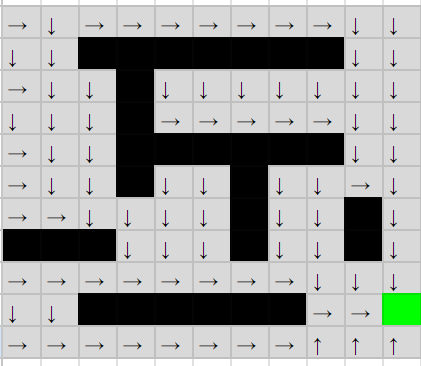